In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.neural_network
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [2]:
datos = pd.read_csv('data.csv')

In [3]:
datos = np.array(datos)

In [4]:
X = datos[:,1:-1]
Y = datos[:,-1]

In [5]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array([int(x) for x in y_train])
y_test = np.array([int(x) for x in y_test])

In [6]:
Ntrain = len(X_train)
Ntest = len(X_test)
mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(4,4,4), max_iter=1000)

In [7]:
F1_train = []
F1_test = []
for i in np.arange(0.1,1.1,0.1):
    x_train = X_train[:int(i*Ntrain)]
    Y_train = y_train[:int(i*Ntrain)]
    x_test = X_test[:int(i*Ntest)]
    Y_test = y_test[:int(i*Ntest)]
    mlp.fit(x_train, Y_train)
    F1_train.append(sklearn.metrics.f1_score(Y_train, mlp.predict(x_train), average='macro'))
    F1_test.append(sklearn.metrics.f1_score(Y_test, mlp.predict(x_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'F1 score')

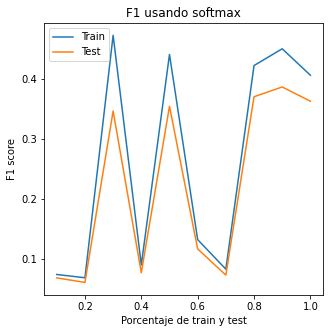

In [16]:
plt.figure(figsize = (5,5))
plt.plot(np.arange(0.1,1.1,0.1),F1_train,label = 'Train')
plt.plot(np.arange(0.1,1.1,0.1),F1_test,label = 'Test')
plt.legend()
plt.title('F1 usando softmax')
plt.xlabel('Porcentaje de train y test')
plt.ylabel('F1 score')

In [17]:
mlp = sklearn.neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=(4,4,4), max_iter=1000)

In [18]:
F1_train = []
F1_test = []
for i in np.arange(0.1,1.1,0.1):
    x_train = X_train[:int(i*Ntrain)]
    Y_train = y_train[:int(i*Ntrain)]
    x_test = X_test[:int(i*Ntest)]
    Y_test = y_test[:int(i*Ntest)]
    mlp.fit(x_train, Y_train)
    F1_train.append(sklearn.metrics.f1_score(Y_train, mlp.predict(x_train), average='macro'))
    F1_test.append(sklearn.metrics.f1_score(Y_test, mlp.predict(x_test), average='macro'))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'F1 score')

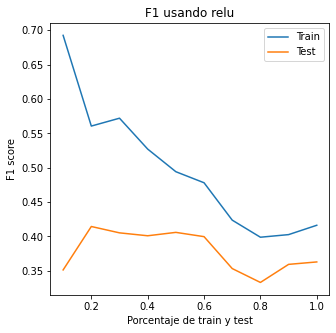

In [19]:
plt.figure(figsize = (5,5))
plt.plot(np.arange(0.1,1.1,0.1),F1_train,label = 'Train')
plt.plot(np.arange(0.1,1.1,0.1),F1_test,label = 'Test')
plt.legend()
plt.title('F1 usando relu')
plt.xlabel('Porcentaje de train y test')
plt.ylabel('F1 score')

In [20]:
alpha = np.logspace(-5,2,20)

In [21]:
F1_train = []
F1_test = []
for i in alpha:
    mlp = sklearn.neural_network.MLPClassifier(alpha = i, activation='relu', hidden_layer_sizes=(4,4,4), max_iter=1000)
    mlp.fit(X_train, y_train)
    F1_train.append(sklearn.metrics.f1_score(y_train, mlp.predict(X_train), average='macro'))
    F1_test.append(sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro'))

Text(0, 0.5, 'F1 score')

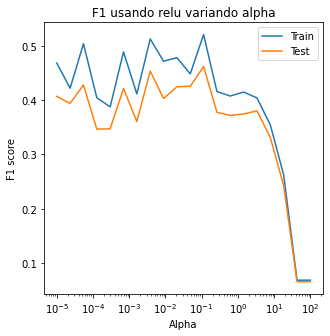

In [23]:
plt.figure(figsize = (5,5))
plt.semilogx(alpha,F1_train,label = 'Train')
plt.semilogx(alpha,F1_test,label = 'Test')
plt.legend()
plt.title('F1 usando relu variando alpha')
plt.xlabel('Alpha')
plt.ylabel('F1 score')

Se observa que el valor de F1 es claramente afectado tanto para softmax como para relu. Sin embargo, mientras usando softmax la variación es imprecisa ya que no hay un comportamiento bien definido, en relu se observa un decrecimiento en F1 a medida que se aumenta el porcentaje de train y test usados. Finalmente, un comportamiento errático es también observado al variar el alpha